<h1 style="background-color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Big Data Life-Cycle</h1>

* [Business Case Evaluation](#1)
* [Data Identification](#2)
* [Data Acquisition & Filtering](#3)
   * [3.1 Import Library](#3a)
   * [3.2 Basic Exploration](#3b)
* [Data Extraction](#4)
* [Data Validation & Cleansing](#5)
   * [5.1 Preprocessing and Outlier Detection](#5a)
* [Data Aggregation & Representation](#6)
* [Data Analysis](#7)
    * [7.1 EDA (Exploratiry Data Analysis)](#7a)
    * [7.2 Machine Learning Models](#7b)
        * [Spilliting the Dataset](#7ba)
        * [A. Logistic Regression](#7bb)
        * [B. Random Forest](#7bc)
        * [C. ADA Boot Classifier](#7bd)
        * [D. Gradient Boosting Classifier](#7be)
        * [E. Decision Tree](#7bf)
* [Semi Supervised](#ss)
* [Data Visualization](#8)
* [Utilization of Analysis Results](#9)

<a id="1"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Business Case Evaluation 
</h1>


The aim of this study is to analyze the health indicators from the dataset to predict diabetes status based on the target variable Diabetes_012, which has three classes representing varying degrees of diabetes risk. This analysis will address the issue of class imbalance while leveraging the 21 feature variables to develop a robust predictive model for identifying individuals at risk of diabetes or already diagnosed with the condition.

<a id="2"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Identification
</h1>



<h2 align="left"><font color=Black>About Dataset:</font></h2>
It focuses on identifying and understanding the data types, sources, and characteristics of available data related to Diabetic patients. So, we are identifying the most needed data, identifying features outcomes, evaluate the quality of the data, and understand any limitations. We are taking the dataset from Kaggle.</h>
</h>

<h2 align="left"><font>Dataset Description:</font></h2>

| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __Diabetes_012__ | Column that shows if person has diabetes (2), prediabetes (1) or no diabetes (0). |
| __HighBP__ | Reveals if a person has High Blood Pressure (1) or not (0) |
| __HighChol__ | Reveals if a person has High Cholesterol (1) or not (0) |
| __CholCheck__ | Depicts period of recent cholesterol check >5years (0) or <5years (1). |
| __BMI__ | Gives the Body Mass Index of the person. |
| __Smoker__ | Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes. |
| __Stroke__ | Ever told had a stroke. 0 = no 1 = yes. |
| __HeartDiseaseorAttack__ | Has coronary heart disease or myocardial infarction, 0 = no 1 = yes. |
| __PhysActivity__ | physical activity in past 30 days, 0 = no 1 = yes. |
| __Fruits__| Consume Fruit 1 or more times per day 0 = no 1 = yes. |
| __Veggies__| Consume Vegetables 1 or more times per day 0 = no 1 = yes. |
| __HvyAlcoholConsump__| Heavy drinker, 0 = no 1 = yes. |
| __AnyHealthcare__| Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes. |
| __NoDocbcCost__| Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes. |
| __GenHlth__ | Would you say that in general your health is, <br> 1 = excellent <br> 2 = very good <br> 3 = good <br> 4 = fair <br> 5 = poor. |
| __MentHlth__ | over the past 30 days how many days was mental health not good. |
| __PhysHlth__ | over the past 30 days how many days was physical health not good. |
| __DiffWalk__ | have any difficulty in walking, 0 = no, 1 = yes. |
| __Sex__ | Gender of the patient, 0 = Female, 1 = Male. |
| __Age__ | It is a 5-year age band, depicting which category does the patient fall in.<br>1 = 18-24 years<br>2 = 25-29 years<br>… <br>12=75-79 years<br>13 = 80+. |
| __Education__ | Education level of the patient. <br> 1 = Never attended school or only kindergarten. <br> 2 = Grades 1 through 8 (Elementary) <br> 3 = Grades 9 through 11 (Some high school) <br> 4 = Grade 12 or GED (High school graduate) <br> 5 = College 1 year to 3 years (Some college or technical school) <br> 6 = College 4 years or more (College graduate). |
| __Income__ | Income scale of the patient. scale 1-8 <br> 1 = lessthan 10,000 <br>5 = lessthan 35,000 <br> 8 = 75,000 or more. |

</h>

<a id="3"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Acquisition & Filtering</h1>


<a id="3a"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">3.1 Importing Libraries</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix, 
)
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.svm import SVC
from sklearn import svm

<a id="3b"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">3.2 Basic Exploration</h3>

In [3]:
df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [4]:
df.shape

(253680, 22)

In [5]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [11]:
columns_to_remove = ["CholCheck", "AnyHealthcare", "NoDocbcCost", "Education", "Income"]
df2 = df.drop(columns=columns_to_remove)

In [12]:
# Count missing values in each column
missing_values = df2.isnull()
missing_count = missing_values.sum()
print("Columns with missing values:")
print(missing_count[missing_count > 0])

Columns with missing values:
Series([], dtype: int64)


<a id="5"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Validation & Cleansing
</h1>


<a id="5a"></a>
<h2 style="background-color:White;font-family:newtimeroman;text-align:center;border-radius: 15px 50px;">5.1 Preprocessing & Outlier Detection </h2>

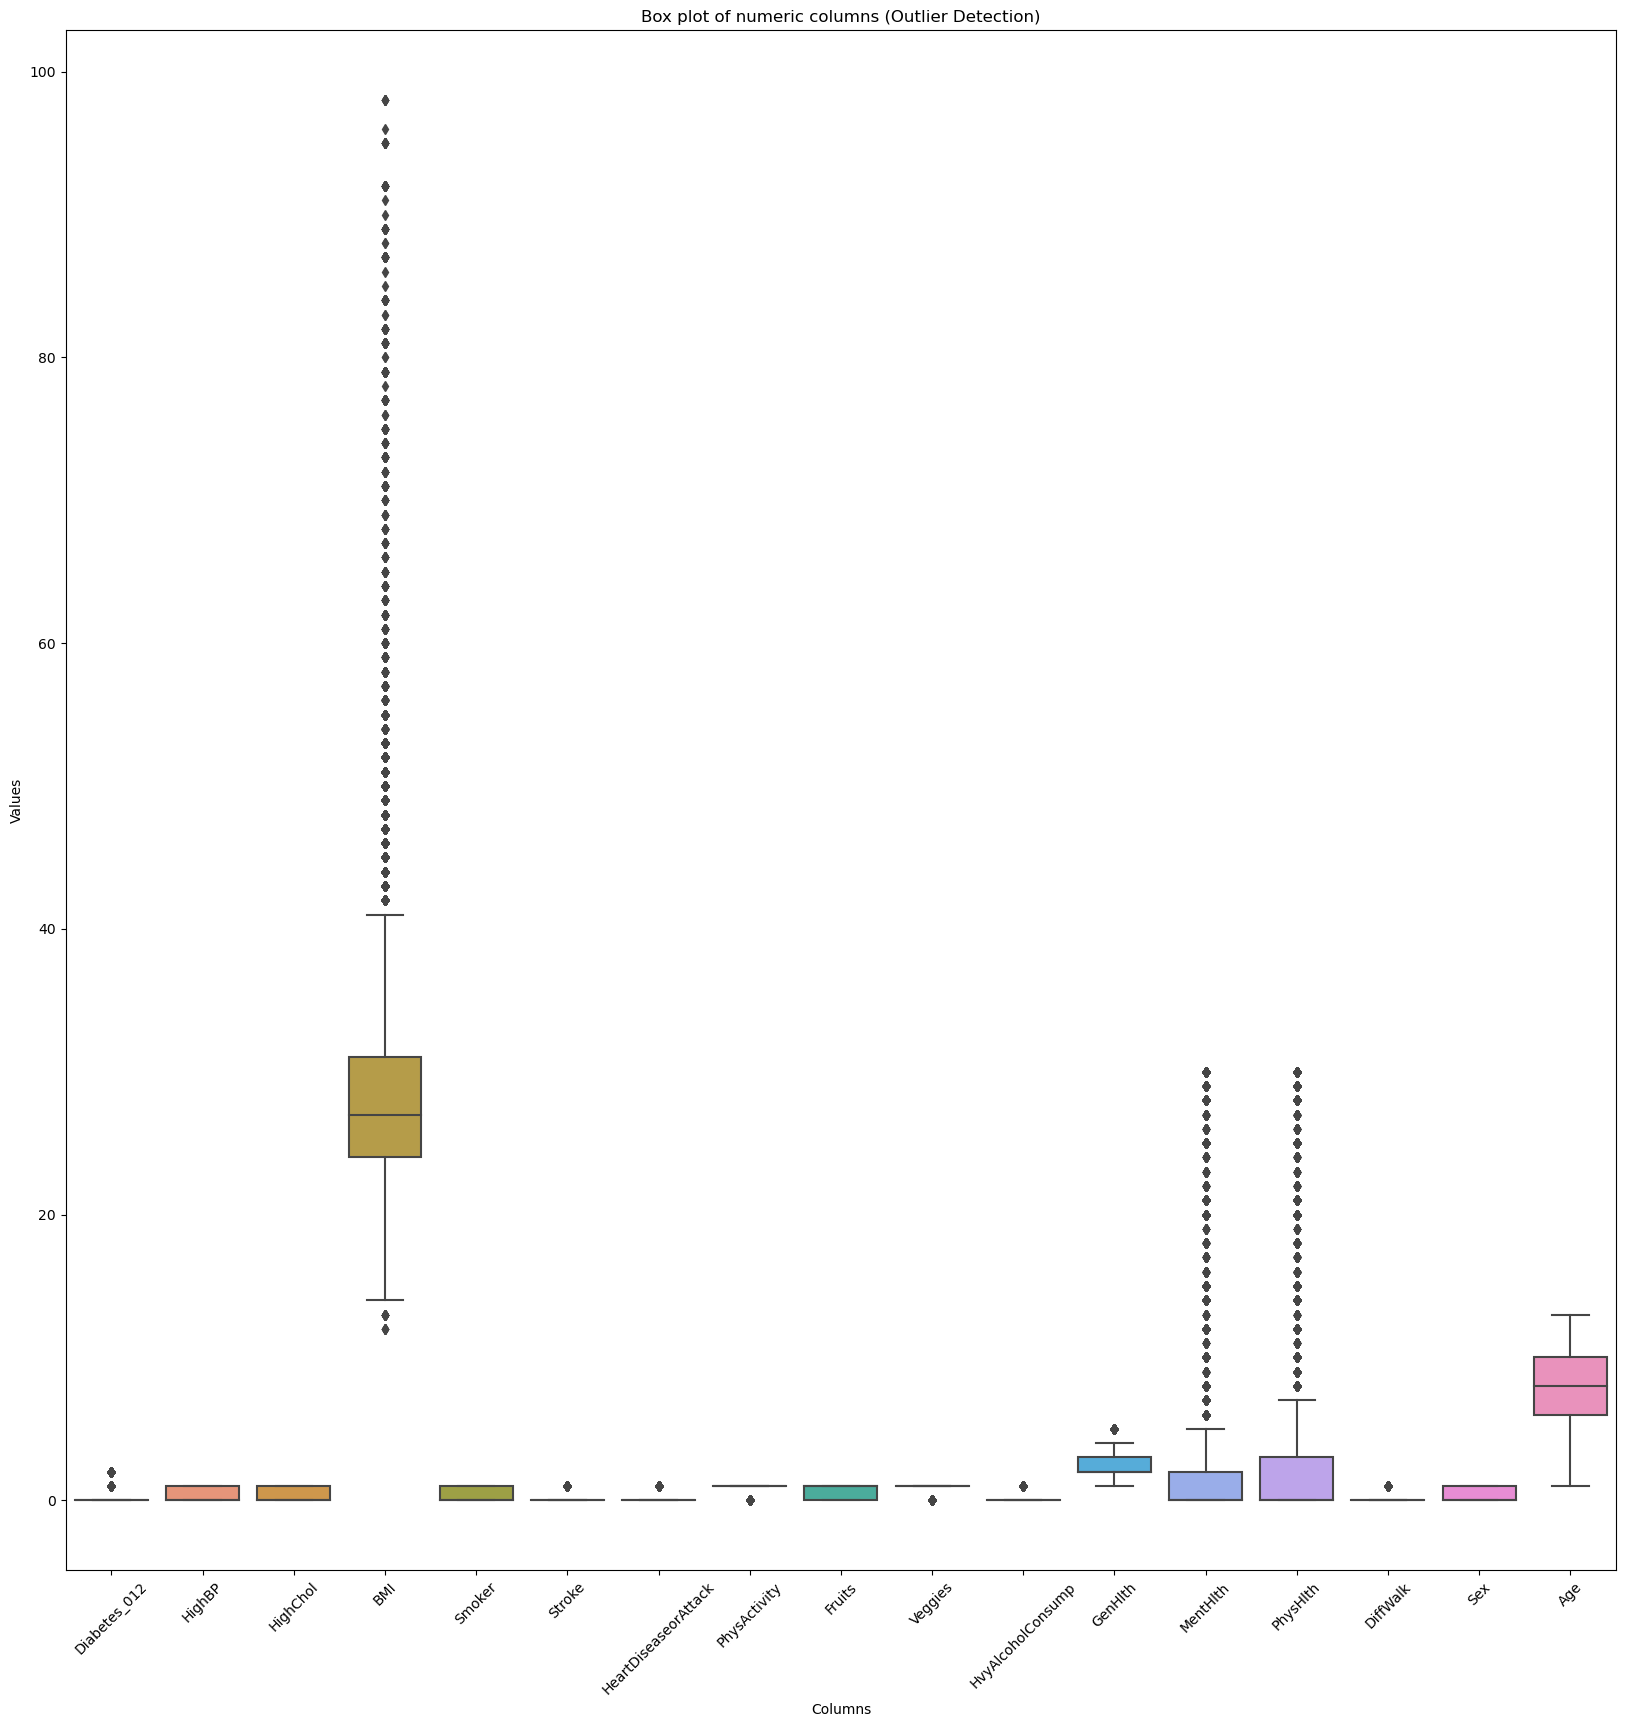

In [13]:

# Select numeric columns for outlier detection
numeric_columns = df2.select_dtypes(include=['int', 'float']).columns

# Create a box plot for each numeric column
plt.figure(figsize=(20, 20))
sns.boxplot(data=df2[numeric_columns])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box plot of numeric columns (Outlier Detection)')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [14]:
df2.head()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [15]:
# copy Dataframeumns)
numerical_columns = ["Diabetes_012","BMI", "GenHlth", "MentHlth", "PhysHlth", "Age"]


df3 = df2.copy(deep=True)

# Selecting numerical columns (excluding binary/boolean col
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df3[numerical_columns] = scaler.fit_transform(df3[numerical_columns])

<a id="6"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Aggregation and Representation</h1>

We do not require any additional merging of the datasets as it has all data of the properties needed to predict if a patient has a risk of diabetes and thus not require any additional dataset aggregation

<a id="7"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Analysis </h1>

<a id="7a"></a>
<h2 style="background-color:White;font-family:newtimeroman;text-align:center;border-radius: 15px 50px;">7.1 EDA (Exploratary Data Analysis) </h2>

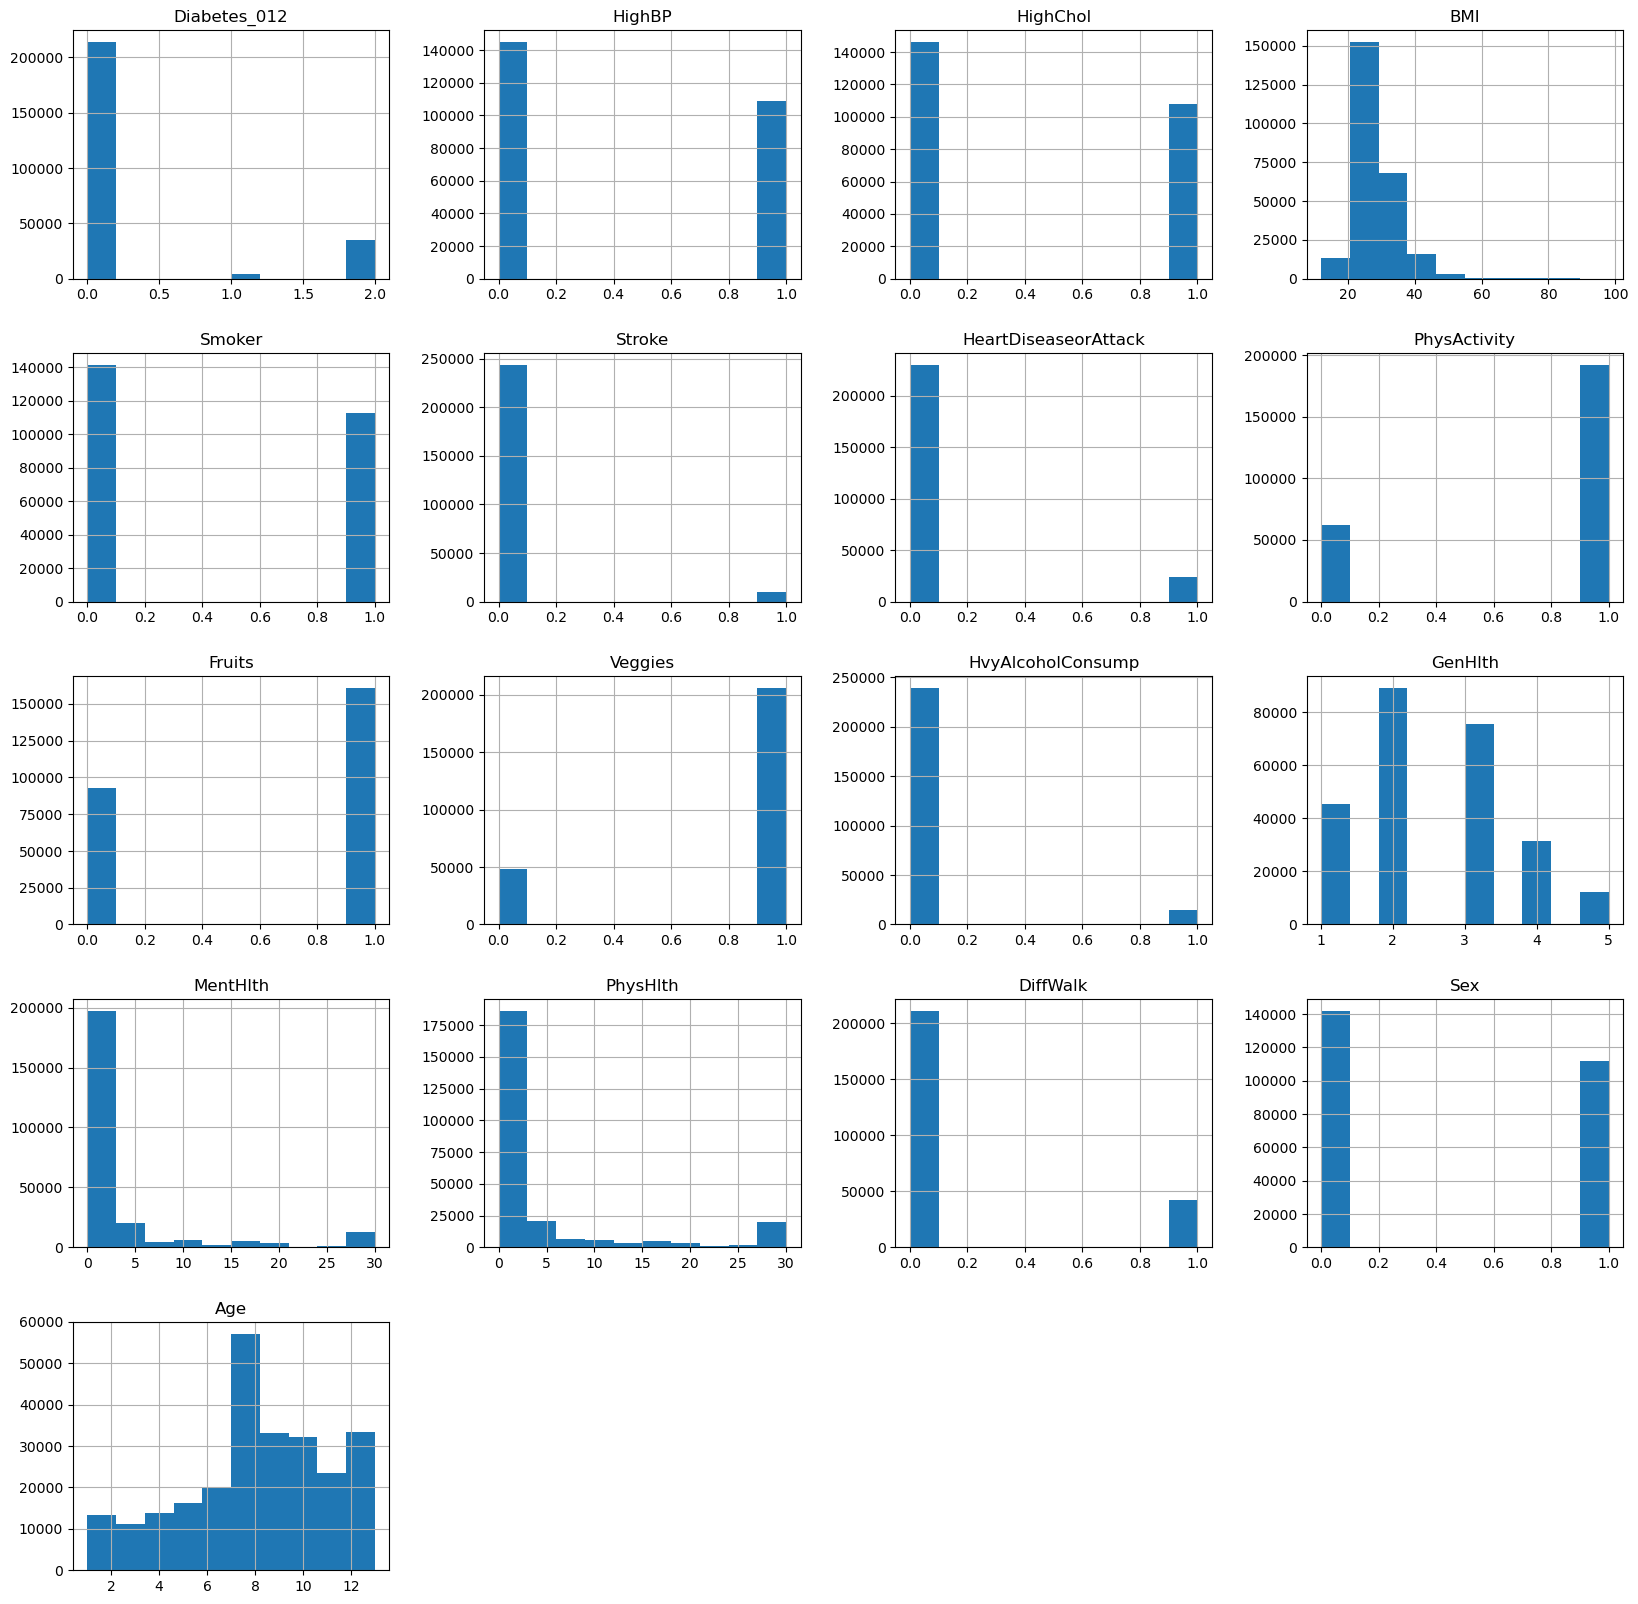

In [16]:
df2.hist(figsize = (20,20))
plt.show()

<Axes: >

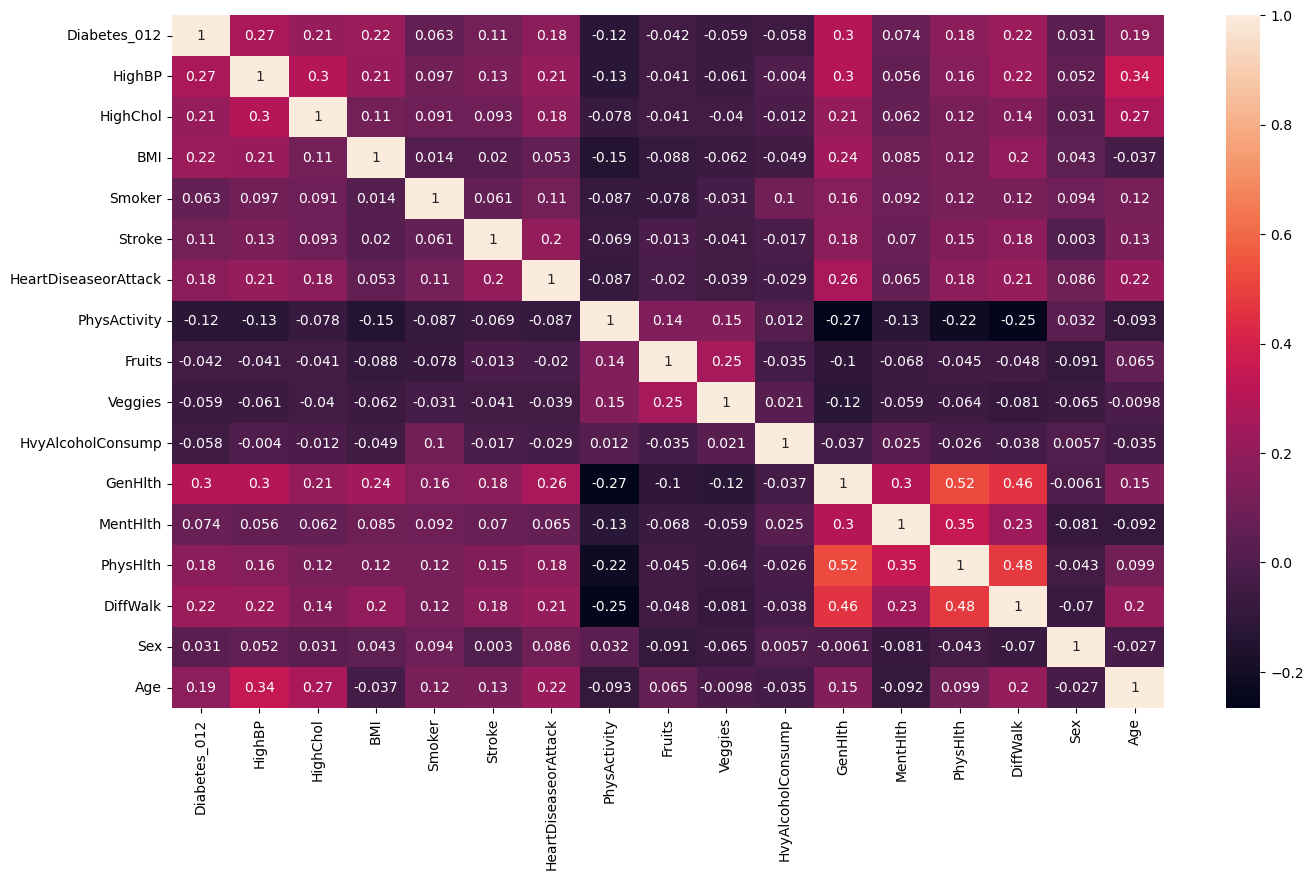

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(), annot=True)

<Axes: >

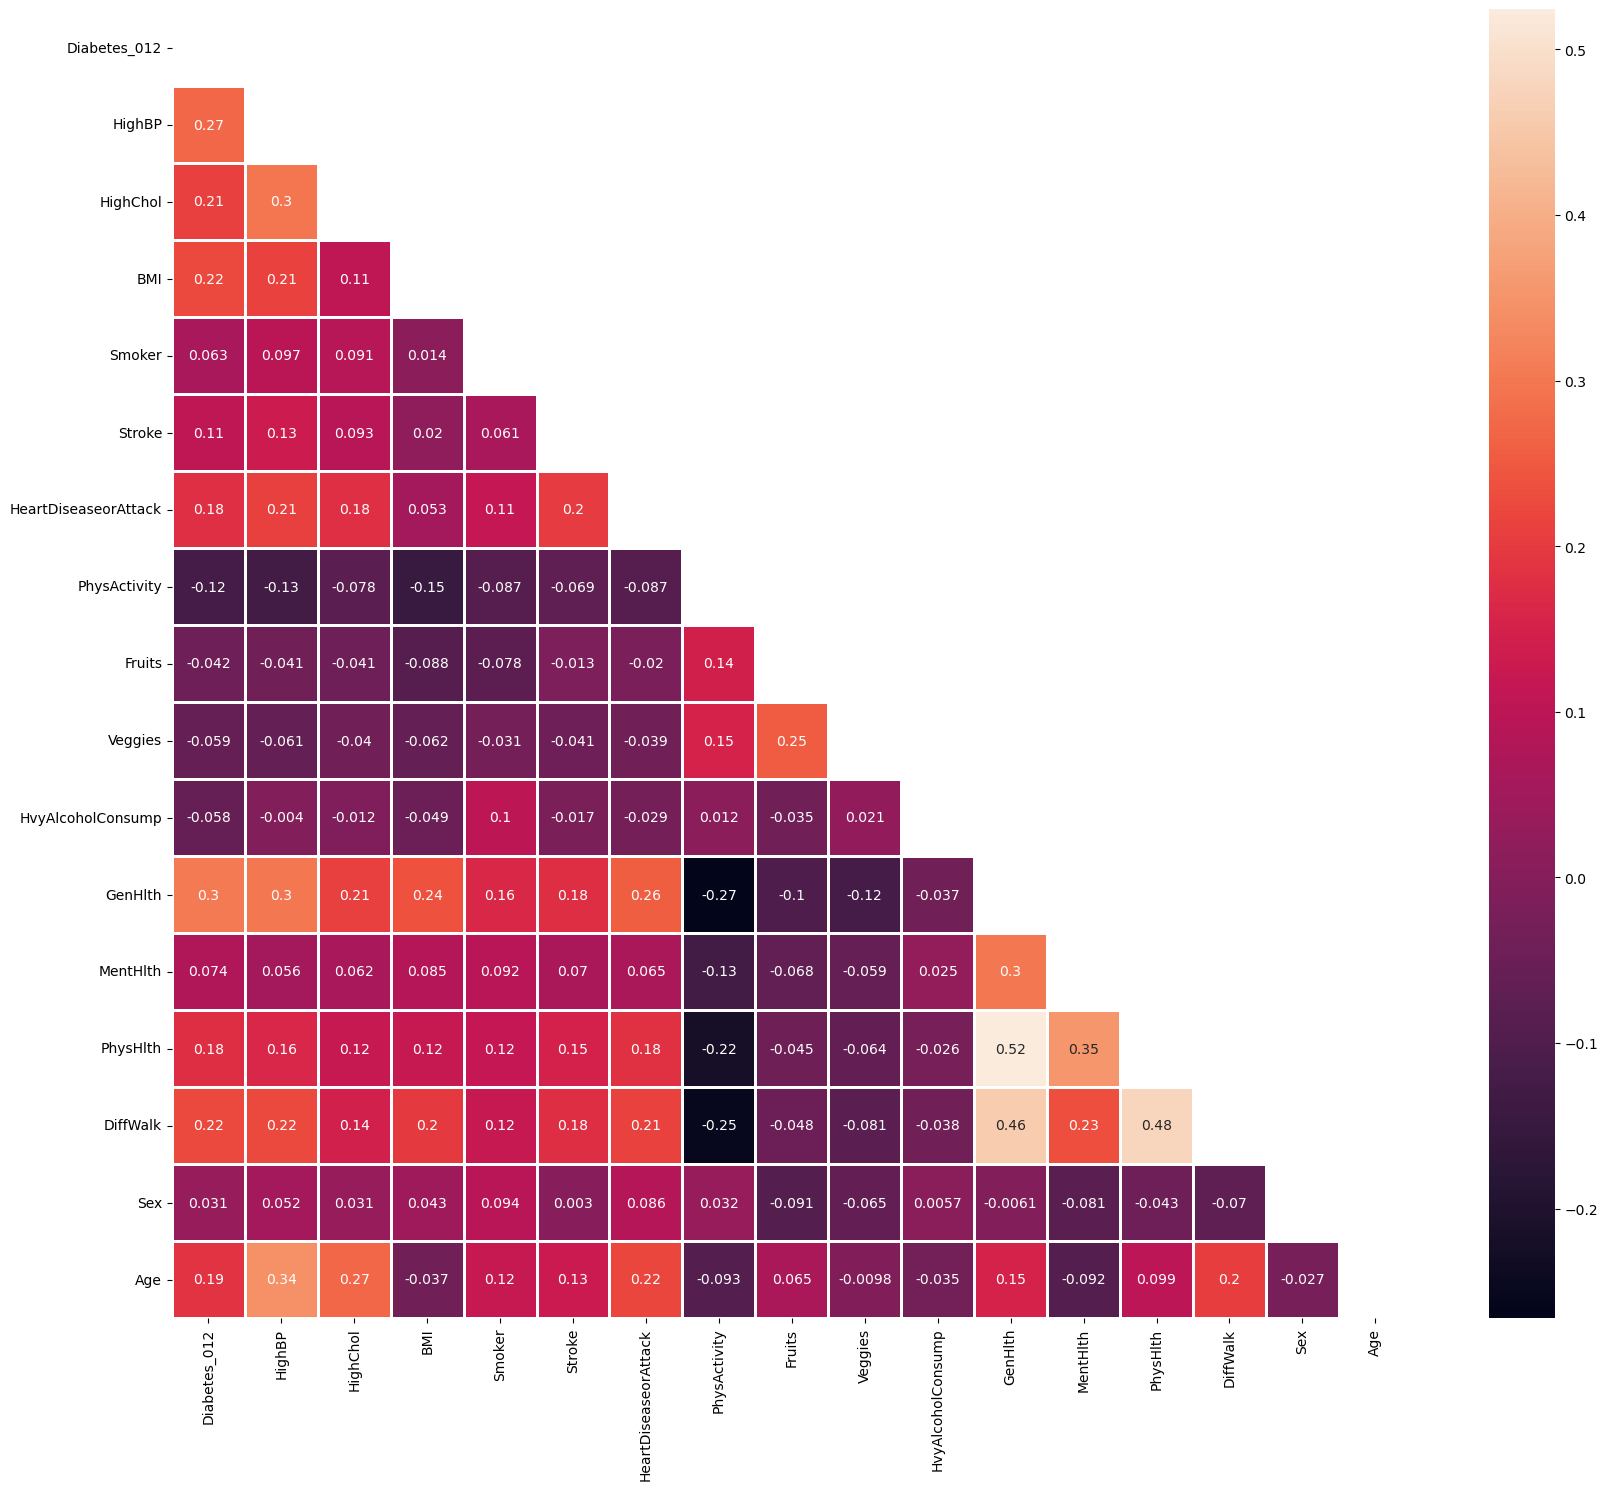

In [18]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df2.corr())
sns.heatmap(df2.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")

In [19]:
#sns.pairplot(data = df,hue = 'Diabetes_012' )
#plt.show()

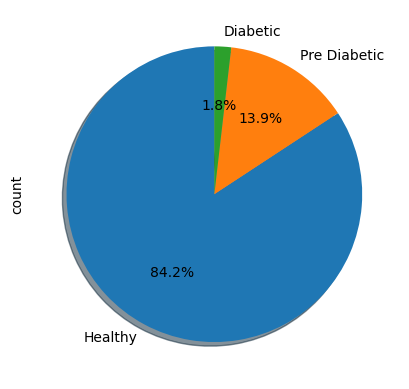

In [20]:
labels = 'Healthy','Pre Diabetic','Diabetic'

df2.Diabetes_012.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

In [21]:
hig_corr = df2.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Diabetes_012"]) >= 0.2]
hig_corr_features

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk'], dtype='object')

<a id="7b"></a>
<h2 style="background-color:White;font-family:newtimeroman;text-align:center;border-radius: 15px 50px;">7.2 Machine Learning Models</h2>

<a id="7ba"></a>
<h3 style="background-color:White;font-family:newtimeroman;text-align:center;border-radius: 15px 50px;">Spilitting the Dataset </h3>

In [22]:
# 'X' is the feature set and 'y' is the target variable
X = df3.drop("Diabetes_012", axis=1)
y = df3["Diabetes_012"].astype("bool")  # Ensuring the target is boolean

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42)

<a id="7bb"></a>
<h3 style="background-color:White;font-family:newtimeroman;text-align:center;border-radius: 15px 50px;">A. Logistic Regression </h3>

In [23]:
#Creating a logistic regression calssifier
log_model = linear_model.LogisticRegression()

# Fitting Random Forest to the Training set
log_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100,2)} %", "\n")

Accuracy: 84.86 % 



<a id="7bc"></a>
<h3 style="background-color:White;font-family:newtimeroman;text-align:center;border-radius: 15px 50px;">B. Random Forest </h3>

In [24]:
#Creating a random forest classifier
random_forest=df2.copy(deep=True)

# 'X' is the set of features and 'y' is the target variable
X_rf = random_forest.drop("Diabetes_012", axis=1)
y_rf = random_forest["Diabetes_012"].astype("bool")  # Ensuring the target is boolean

# Splitting the dataset into the Training set and Test set
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.25, random_state=42)

# Creating a Random Forest Classifier -- You can adjust parameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting Random Forest to the Training set
rf_classifier.fit(X_rf_train, y_rf_train)

# Predicting the Test set results
y_pred_rf = rf_classifier.predict(X_rf_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_rf_test, y_pred_rf)

print("\nRandom Forest prediction results:", "\n")
print(f"Accuracy: {round(accuracy_rf*100,2)} %", "\n")


Random Forest prediction results: 

Accuracy: 83.48 % 



<a id="7bd"></a>
<h3 style="background-color:White;font-family:newtimeroman;text-align:center;border-radius: 15px 50px;">C. ADA Boot Classifier </h3>

In [25]:

ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fitting Ada Boost to the Training set
ada_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_adaboost = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy: {round(accuracy*100,2)} %", "\n")

Accuracy: 85.11 % 



<a id="7be"></a>
<h3 style="background-color:White;font-family:newtimeroman;text-align:center;border-radius: 15px 50px;">D. Gradient Boosting Classifier </h3>

In [26]:
gbc_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the GBC model to the training data
gbc_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_gbm = gbc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gbm)
print(f"Accuracy: {round(accuracy*100,2)} %", "\n")

Accuracy: 85.12 % 



<a id="7bf"></a>
<h3 style="background-color:White;font-family:newtimeroman;text-align:center;border-radius: 15px 50px;">E. Decision Tree </h3>

In [27]:
# Create a DecisionTreeClassifier object
tree_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier
tree_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 79.25%


<a id="8"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Visulization </h1>

### Confusion matrix

Text(0.5, 0, 'Predicted label')

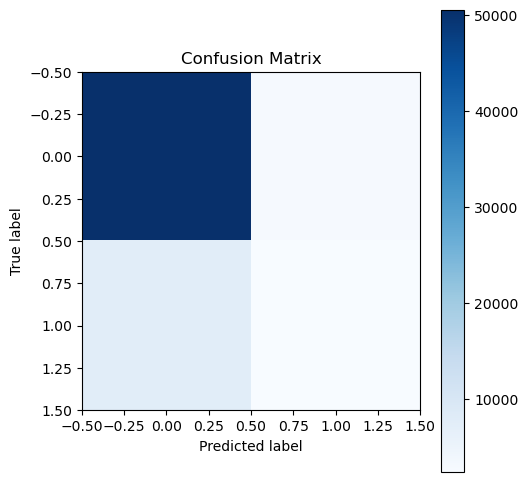

In [28]:
#data visualization
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

# Plot confusion matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_rf_test, rf_classifier.predict(X_rf_test))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Roc Curve

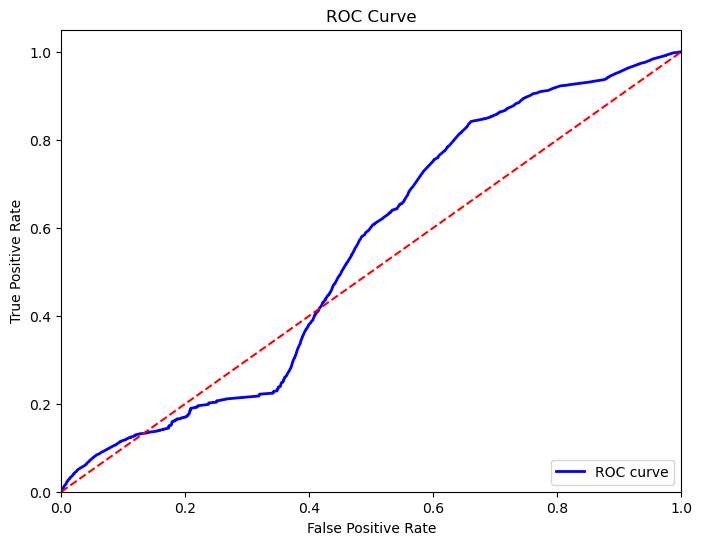

In [29]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gbc_model.predict_proba(X_rf_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Precision-Recall Curve

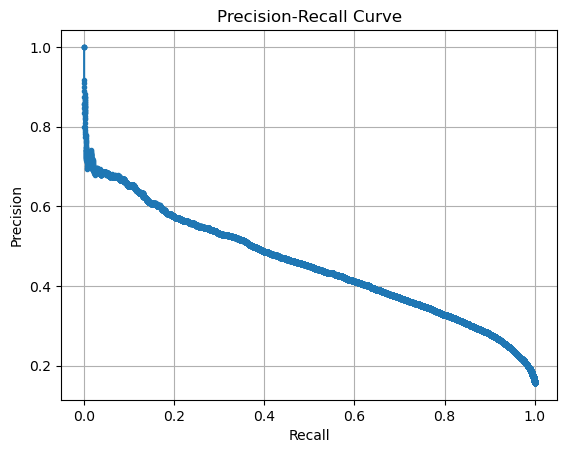

In [30]:
# Compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, gbc_model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


<a id="8"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Visualization </h1>

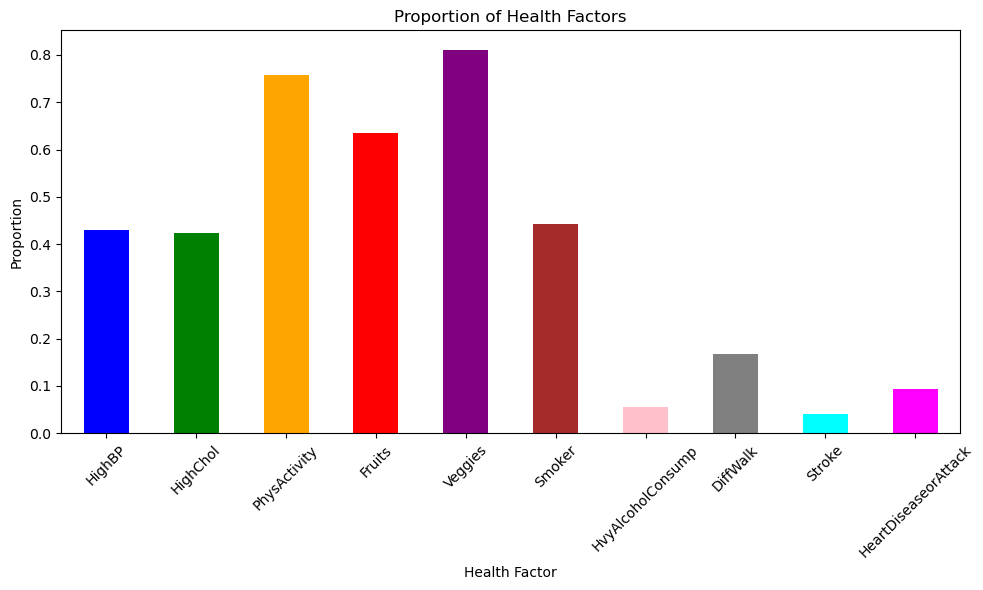

In [35]:
combinedBarChart = [
    'HighBP', 'HighChol', 'PhysActivity', 'Fruits', 'Veggies',
    'Smoker', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HeartDiseaseorAttack'
]
df4 = df[combinedBarChart]

health_factors = df4.sum() / len(df4)

plt.figure(figsize=(10, 6))
health_factors.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.title('Proportion of Health Factors')
plt.xlabel('Health Factor')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id="7"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Utilization of Analysis Results </h1>

#### 1. Identify individuals who are at high risk of diabetes based on their demographic and health-related features. 
####  2. Allocate healthcare resources more efficiently by targeting high-risk individuals for intensive interventions while    providing standard care to low-risk individuals. This can help improve the effectiveness of healthcare delivery and reduce healthcare costs associated with diabetes management. 
#### 3. Individuals with high BP, high Cholesterol, high BMI, and low General Health are at increased risk of diabetes, interventions can focus on weight management, blood pressure control, and smoking cessation. 

Overall, the modelling results can be valuable in informing decision-making at both individual and population levels, contributing to efforts to prevent and manage diabetes and improve public health outcomes. 